# Stroke and fill paths at the same time

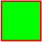

In [1]:
from pyx import *

c = canvas.canvas()
c.stroke(path.rect(0, 0, 1, 1), [style.linewidth.Thick,
                                 color.rgb.red,
                                 deco.filled([color.rgb.green])])
c

In order to stroke and fill a path, you could call the `fill` and `stroke`
methods of a canvas instance one after the other. However, such a solution is
not optimal since the path would be written into the output file twice.
Instead, you can use the `filled` decorator within a `stroke` method call as an
additional attribute. 

In the example code, the filled decorator is called to pass additional
styles, which will then only be used for the fill operation. Other styles
passed in the second argument of the `stroke` method are used for both, the
stroke and the fill operation. Here we set a linewidth, which only affects the
stroke operation.

A complementary functionality exists as well: you can use a `deco.stroked`
instance to add a stroke operation within a `fill` method call.

<img src="http://pyx.sourceforge.net/bend.png" align="left"> The `filled` and `stroked` are pre-defined instances, but they accept a
*modify by call* operation. This is a common feature of decorators and other
attributes.

<img src="http://pyx.sourceforge.net/bend.png" align="left"><img src="http://pyx.sourceforge.net/bend.png" align="left"> Internally, the `stroke` and the `fill` methods are implemented by adding either
`deco.stroked` or `deco.filled` to the list passed as the second parameter to the
`stroke` or `fill` method of a canvas. This whole construction is then evaluated by
the `draw` method of the canvas instance. The draw method is really the basic
operation to output a path. It transforms a path into a so-called decorated
path. The mere path itself is a pure mathematical object without any information
about how it should be drawn and which styles should be applied.
Output-specific properties like dashing or the linewidth are not attached to
the path at all. In contrast, the decorated path attaches styles and the two output
operations stroke and fill to the mathematical path object. A symmetric stroke
and fill operation therefore looks like

    c.draw(p, l1 + [deco.stroked(l2), deco.filled(l3)])

where `c` is the canvas instance, `p` is the path to be stroked and filled, `l1` is
a list of styles used for both stroking and filling, `l2` are additional styles
used for stroking, and `l3` are additional styles used for filling.
